# Python機械学習 勉強会 第二回「教師あり学習1」

参考文献：  
Pythonではじめる機械学習　2章  
https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

scikit-learnドキュメント：  
https://scikit-learn.org/stable/documentation.html

In [1]:
%matplotlib inline
from preamble import *

<br>

---

## はじめに
まずは、最も一般的な機会学習タスクである教師あり学習のアルゴリズムを学ぶ。  

各アルゴリズムの長所と短所、適しているデータ、モデル構築方法について学んでいく。

<br>
今回は以下の内容を取り組む

* サンプルデータの概要

* 教師あり機械学習アルゴリズム
    * 今後使用するデータセットの概要
    * k-最近傍法
    * 線形モデル
        * 通常最小二乗法
        * Ridge回帰 (L2正則化)
        * Lasso回帰 (L1正則化)

<br>

---

## 1. サンプルデータ

アルゴリズムを学ぶために用いるサンプルデータの素性を確認する。

<br>

### 1-1. forgeデータセット (2クラス分類データセット)

2つの特徴量をもつ26のデータポイント、各クラス値で構成されているデータセット。

C:\Users\0060778-z100\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)



X.shape: (26, 2)



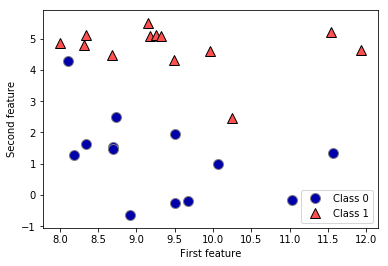

In [2]:
# データセットの生成
X, y = mglearn.datasets.make_forge()

# データセットをプロット
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("\nX.shape: {}\n".format(X.shape))

<br>

### 1-2. waveデータセット(回帰データセット)
1つの特徴量と連続値のターゲット変数で構成されているデータセット。

Text(0, 0.5, 'Target')

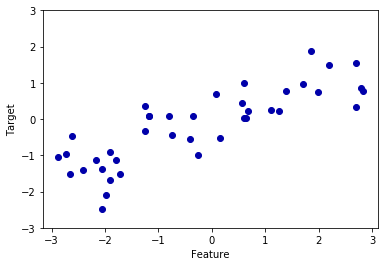

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

<br>

### 1-3. 乳がんデータセット(実世界のクラス分類データセット)

乳がんの腫瘍を計測したもので、それぞれの腫瘍に、害がない腫瘍である「良性(benign)」か、  
がん性の腫瘍を意味する「悪性(malignant)」のラベルが付けられている。

このデータはscikit-learnの***load_breast_cancer***関数で呼び出せる。

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
#データセットの詳細を表示
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
#データの数
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [7]:
# 各クラスの数
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [8]:
#特徴量の名前
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


<br>

### 1-4. ボストン住宅価格データセット(実世界の回帰データセット)

1970年代のボストン近郊の住宅かっくの中央値を、犯罪率やチャールズ川からの距離などから予測するタスク。  

このデータはscikit-learnの***load_boston***関数で呼び出せる。

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("boston.keys():\n", boston.keys())

boston.keys():
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [10]:
#データセットの詳細を表示
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
#データの数
print("Shape of boston data:", boston.data.shape)

Shape of boston data: (506, 13)


<br>

また、ここではこのデータセットを拡張し、13の特徴量だけでなく各特徴量間の積(交互作用)も見る。  
つまり、各特徴量間の積も新たな特徴量としてあつかう。  

このデータはmglearnの***load_extended_boston***関数で呼び出せる。  

このように導出された特徴量を含めることを**特徴量エンジニアリング**と呼ぶ。  
詳細は後の勉強会で取り扱う。

In [12]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


<br>

---

## 2.  教師あり機械学習アルゴリズム

上記データセットを用いて、さまざまな機会学習アルゴリズムを説明していく。  
ここでは、以下のアルゴリズムについて取り扱う。  

1. k-最近傍法
1. 線形モデル
1. 決定木
1. 決定木のアンサンブル法
1. カーネル法をもちいたサポートベクタマシン
1. ニューラルネットワーク(ディープラーニング)

<br>

---

### 2-1. k-最近傍法

最も単純な学習アルゴリズム。  
新しいデータポイントに対する予測は、訓練データセットの中から一番近い点「最近傍点」を見つける。

<br>

#### 2-1-1. k-最近傍法によるクラス分類

一番単純なk-NNアルゴリズムは、1つの最近傍点のみで予測する場合。  
その例を示す。

C:\Users\0060778-z100\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


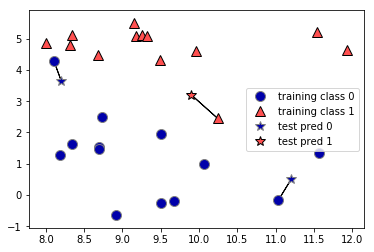

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

<br>

k-NNアルゴリズムは、近傍点の数を任意の数(k)にすることができる。  
例を示す。

C:\Users\0060778-z100\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


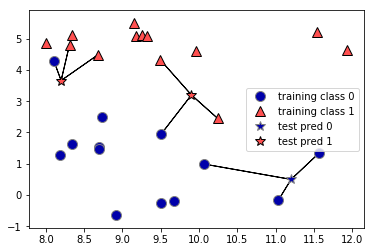

In [14]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

<br>

このk-NNアルゴリズムを用いて、クラス分類をやってみる。  

まずは、データを訓練データとテストデータに分割する。

In [15]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\0060778-z100\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
print('original data shape\t: {}'.format(X.shape))
print('X_train shape\t\t: {}'.format(X_train.shape))
print('X_test shape\t\t: {}\n'.format(X_test.shape))
print('original target shape\t: {}'.format(y.shape))
print('y_train shape\t\t: {}'.format(y_train.shape))
print('y_test shape\t\t: {}'.format(y_test.shape))

original data shape	: (26, 2)
X_train shape		: (19, 2)
X_test shape		: (7, 2)

original target shape	: (26,)
y_train shape		: (19,)
y_test shape		: (7,)


<br>

次に、k-NNモデルのインスタンスを生成し、訓練データをもちいて訓練する。  
ここでは、近傍点の数を3に指定した。

In [17]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

<br>

構築したモデルを用いて、テストデータに対して予測を行うには、**predict**メソッドを用いる。

In [18]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


X_testは7つのデータなので、各7つに対して予測している

<br>

モデルの汎化性能を評価するには、**score**メソッドを用いる。

In [19]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


<br>

つまり、このモデルはテストデータのうち86%に対して、正しく暮らすを予測した、ということになる。

<br>

#### 2-1-2. KNeighborsClassifierの解析
決定境界を図示することで、k-NNアルゴリズムの挙動を確認する。

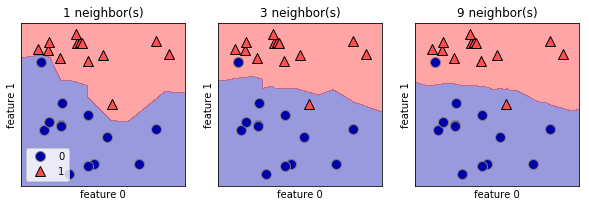

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fitメソッドは自分自身を返すので、1行でインスタンスを生成してfitできる
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

<br>
図は左から近傍点を1, 3, 5に指定したときの、クラス分類の境界線=決定境界(decision boundary)を図示している。

1つの最近傍点のみをもちいると決定境界は複雑になり、近傍点の数を増やすと決定境界がなめらかになる。  

つまり、近傍点の数が少ない場合は複雑なモデルに対応し、逆に近傍点が多い場合は単純なモデルに対応する。

ここで、複雑さと汎化性能の関係を、実例を用いて確認する。

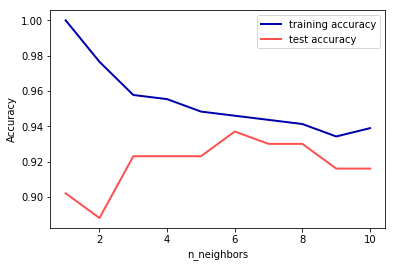

In [21]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

このグラフは、乳がんデータに対してk-NNアルゴリズムで分類した結果である。  

y軸に訓練データおよびテストデータに対する精度を、x軸に指定した近傍点の数を設定している。  

* 1つの最近傍点の場合は、訓練データは完璧だが、テストデータの結果は芳しくない。  
* 近傍点の数を増やしていくと、訓練データに対する精度は落ちていくが、テストデータの精度は高くなっていく。
* ただし、近傍点の数を増やしすぎると、モデルがシンプルになりすぎて、性能はまた低下していく

この例では、近傍点の数が6の時がテストデータの精度が一番高く、すなわち一番汎化性能が高いポイントとなる。

この図のように、訓練データに過剰に学習している状態(図左側)を、**過学習**と呼ぶ。  
逆に、訓練データに対して学習が足りていない状態(図右側)を、**学習不足**と呼ぶ。

<br>

#### 2-1-3. k-近傍回帰


k-最近傍法には回帰を行う変種がある。  
クラス分類と同じく、1つの最近傍点から回帰を行う場合や、複数の近傍点を参照するパターンもある。
ここではwaveデータセットを用いて、k-近傍回帰の動きを見ていく。

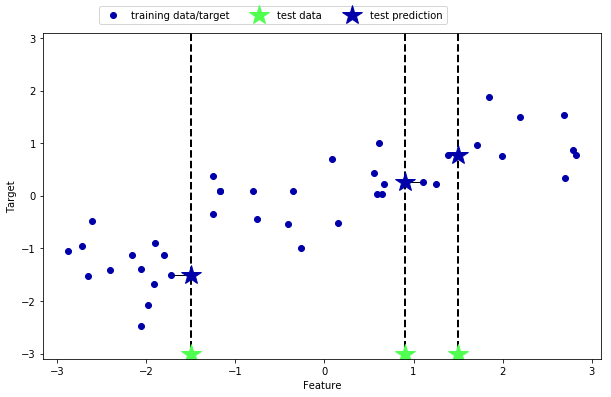

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

waveデータセットは、x軸に1つだけ存在する特徴量をとり、y軸にターゲットをとる。  
今、3つのテストポイントを緑色の★で表示し、予測を青い★で表示した。  

図の通り、1最近傍点を用いる回帰(予測)では、**最近傍点の値をそのまま使う**。

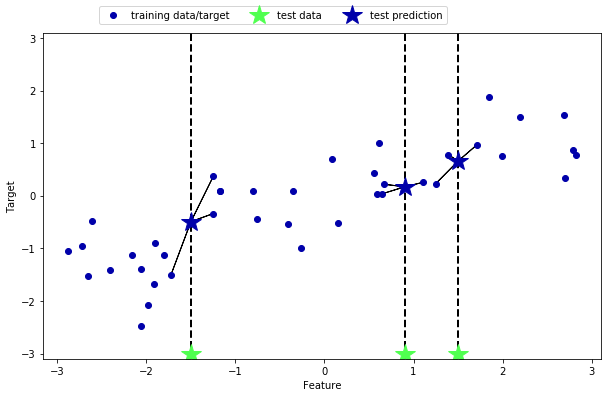

In [23]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

クラス分類と同様に、複数の近傍点を用いることもできる。  
その場合は参考にした近傍点の平均値で回帰する。

回帰で用いるk-最近傍点アルゴリズムは、scikit-learnの***KNeighborsRegressor***クラスに実装されている。

In [24]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# waveデータセットを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3つの最近傍点を考慮するとうに設定し、モデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)

# 訓練データを用いてモデル学習
reg.fit(X_train, y_train)

# テストデータに対して回帰予測
print("Test set predictions:\n", reg.predict(X_test))

# モデルの評価
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set predictions:
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]
Test set R^2: 0.83


<br>

### TIPS

ここではモデルの評価に***score***メソッドを用いて、R^2スコア(決定係数(coefficient of determination))を算出している。

R^2スコアは回帰モデルの予測の正確さを表しており、0～1までの値を取る。(1が完全な予測)  

ここではR^2スコアが0.83となっており、比較的良好なモデルであることを意味している。

<br>

#### 2-1-4. k-近傍回帰の解析

1次元のデータセットに対して、近傍点の数を変えたときに予測値がどうなるか確認する。  
ここでは、たくさんのデータポイントをもつデータセットを生成して確認する。

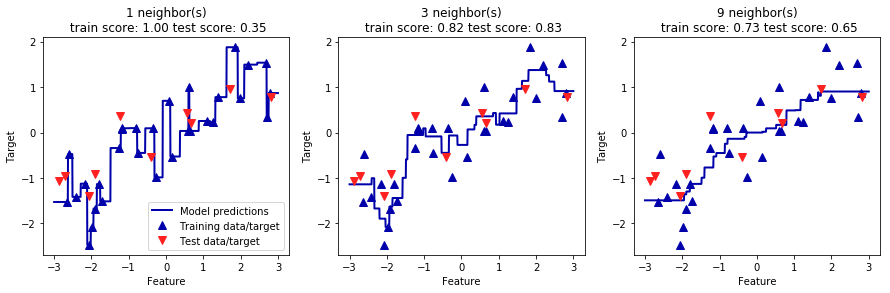

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# -3～3までの間に、1,000点のデータポイントを作る。
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9, それぞれの近傍点1で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

図からわかる通り、1最近傍点による回帰では、訓練データの個々の点が予測に影響しており、  
予測値はすべての訓練データポイントを通っている。
そのため、予測は非常に不安定になっている。

近傍点の数を増やすと予測はスムーズになるが、訓練データに対する適合度は下がる。

<br>

#### 2-1-5. 利点と欠点とパラメータ

k-最近傍点の利点の1つは、モデルが理解しやすいこと。また、多くの場合はあまり調整しなくても十分に動くこと。

欠点として、処理速度が遅く、多数の特徴量(数百以上)をもつデータセットには対応できない。  
そのため、実際にはほとんどつかわれていない。(ベースラインとして試されることはある)

<br>

---

### 2-2. 線形モデル

実用的に広く使われているアルゴリズム。入力特徴量の線形関数(linear function)を用いて予測を行う。

<br>

#### 2-2-1. 線形モデルによる回帰

回帰問題では、線形モデルによる一般的な予測式は以下のようになる。

$$
\hat{y} = w[0] × x[0] + w[1] × x[1] + … + w[p] × x[p] + b
$$

ここではx[0]からx[p]は、ある1データポイントの特徴量(この例では特徴量の数はp+1)を示し、  
wとbは学習されたモデルのパラメータであり、$\hat{y}$ はモデルからの予測を意味する。

特徴量が1つしかないデータセットであれば、次のようになる。

$$
\hat{y} = w[0] × x[0] + b
$$

この式は直線を表しており、w[0]が傾き、bが切片を意味する。

1次元のwaveデータセットでw[0]とbを求めてみると、次の図のようになる。

w[0]: 0.393906  b: -0.031804


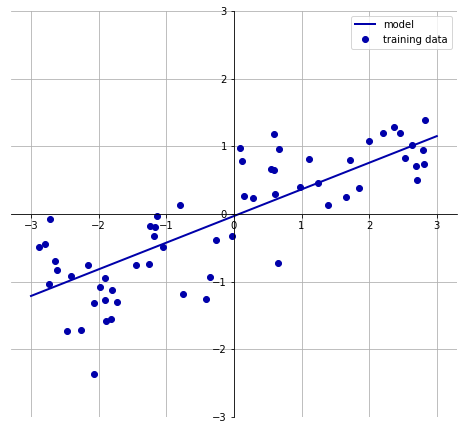

In [26]:
mglearn.plots.plot_linear_regression_wave()

回帰における線形モデルは、単一の特徴量に対しては予測が直線になる回帰モデルとして特徴付けられる。

特徴量が2つなら予測は平面になり、もっと特徴量が多い場合は超平面となる。

線形モデルを用いた回帰にはさまざまなアルゴリズムがあり、パラメータwとbを訓練データから学習する方法と、  
モデルの複雑さを制御する点でそれぞれ異なる。

<br>

#### 2-2-2. 線形回帰(通常最小二乗)

線形回帰、もしくは通常最小二乗法(ordinary least aquares:OLS)は、最も単純で古典的な線形回帰手法である。

線形回帰では、予測値と新値との平均二乗誤差(mean squared error)が最小となるように、パラメータwとbを求める。
→予測値と真値の差を二乗したものの平均値

ここで、上の線形回帰の図で用いたモデルを作成する。

scikit-learnでは、linear_modelモジュールの***LinearRegression***クラスに実装されている。

In [27]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

<br>

「傾き」を表すwは、重み、もしくは**係数(coefficient)**と呼ばれ、coef_属性に格納される。

オフセット、もしくは**切片(intercept) = b**はintercept_属性に格納される。

In [28]:
print("lr.coef_\t:", lr.coef_)
print("lr.intercept_\t:", lr.intercept_)

lr.coef_	: [0.394]
lr.intercept_	: -0.031804343026759746


<br>

### TIPS

属性名の最後に「_(アンダースコア)」がついている。  
これは、acikit-learnでは訓練データから得られた属性には最後に_をつける慣習となっているから。  
→ユーザーが設定したパラメータと明確に区別するため

<br>

In [29]:
print("Training set score\t: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score\t\t: {:.2f}".format(lr.score(X_test, y_test)))

Training set score	: 0.67
Test set score		: 0.66


訓練データとテストデータに対する性能を見たところ、R^2スコアが0.66付近となった。

これは恐らくは学習不足であり、過学習ではない。
* 1次元データのような単純なモデルでは過学習の危険は少ない
* 高次元(多くの特徴量)のような複雑なモデルでは、線形モデルは強力だが過学習の可能性が高くなる

<br>

ここで、LinearRegressionが、前述したboston_housingデータセット(104の特徴量をもつ506サンプル)に対して、  
どのような挙動を示すか確認する。

In [30]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score\t: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score\t\t: {:.2f}".format(lr.score(X_test, y_test)))

Training set score	: 0.95
Test set score		: 0.61


訓練データに対しては非常に正確だが、テストデータのR^2値は悪いことがわかる。  

このように訓練データとテストデータで性能が大きく異なるのは、過学習が起きている兆候である。
したがってモデルの複雑度を制御しなければいけない。

過学習を防ぐためにモデルを制約する方法をが**正則化(せいそくか)(regularization)**と呼ぶ。  

代表的な手法として以下2つの方法を確認していく
* リッジ回帰(L2正則化)
* Lasso回帰(L1正則化)

<br>

#### 2-2-3. リッジ回帰(L2正則化)

線形モデルによる回帰の1種であり、予測に用いられる式は通常最小二乗法のものと同じ。

ただし、係数(w)を、訓練データに対する予測だけでなく、他の制約に対しても最適化する。

ここでは、係数の絶対値の大きさを可能な限り小さく、つまり0に近づけたい。  
→予測をうまく行いつつ、個々の特徴量の影響を小さくしたい

<br>
実際に動きを確かめてみる。

scikit-learnでは、linear_modelモジュールの***Ridge***クラスに実装されている。

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score\t: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score\t\t: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score	: 0.89
Test set score		: 0.75


上記LinearRegressionの場合より、訓練データのスコアは低いが、テストデータのスコアが高くなっている。

これはRidgeが制約が強いモデルでありモデルが複雑度が低くなっており、つまり、過学習が起きていないことを意味する。  
つまり、RidgeはLinearRegressionよりも汎化性能が高い。  

Ridgeモデルでは、モデルの簡潔さ(0に近い係数の数)と訓練データに対する性能がトレードオフとなる。  
→制約によってパラメータが0に近い値となった特徴量の数が多いと、訓練データから遠ざかる

どちらに重きを置くかは、パラメータ**alpha**で指定できる。(デフォルトはalpha=1.0)  
最良のalphaはデータセットによって異なる。

alphaを増やすと係数は0に近くなり、汎化性能が向上する。(ただし訓練データに対する性能は低下する)

In [32]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score\t: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score\t\t: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score	: 0.79
Test set score		: 0.64


In [33]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score\t: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score\t\t: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score	: 0.93
Test set score		: 0.77


今回のケースでは、alpha=0.1がうまくいっているように見える。

このようにalphaの値を適合することで、汎化性能を高めることができる。
* パラメータを適合する方法は後の勉強会で学ぶ

<br>

alphaパラメータのモデルへの影響を定量的に知るには、**coef_**属性を確認する。  
→係数の値が分かる


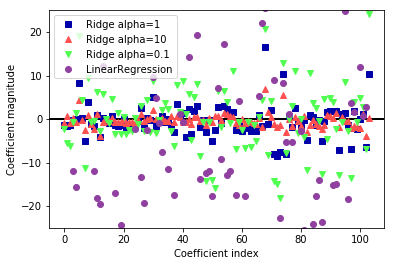

In [34]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

上の図は、x軸はcoef_の要素(元データセットの各特徴量に対する係数)、y軸に係数の数値を表している。

alphaが大きくなるほど各係数の数が0の近くに集まっており、制約されていることがわかる。

<br>

正則化の影響を理解するもう1つの方法として、alphaの値は固定し、利用できる訓練データの数を変化させてみる。

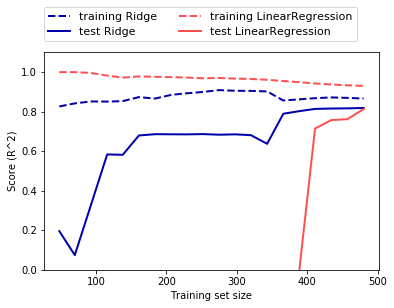

In [35]:
mglearn.plots.plot_ridge_n_samples()

上の図は、x軸にモデルの学習に用いる訓練データの量、y軸にスコアを定義しており、  
LinearRegressionとRidgeの2種類のモデルの学習結果をプロットしている。

* Ridgeは正則化=制約を行っているので、訓練スコアは線形回帰より悪い
* ただし、テストスコアは線形回帰より良い(特にデータ数が少ない場合)
* 訓練データが十分にある場合は、Ridgeも線形回帰も同等となり、正則化はあまり重要でなくなることが分かる


<br>

#### 2-2-4. Lasso回帰(L1正則化)

次に、正則化手法のもう1つの方法であるLassoについて学んでいく。  

LassoもRidge同様に係数が0になるように制約をかけるが、大きな違いは、  
いくつかの係数が**完全に0になる**ことである。

つまり、そのモデルにおいて、データのいくつかの特徴量が完全に無視されることになる。  
言い換えれば、自動的に特徴量を選択していると考えてもよい。

<br>
実際に動きを確かめてみる。

scikit-learnでは、linear_modelモジュールの***Lasso***クラスに実装されている。

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score\t: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score\t\t: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used\t:", np.sum(lasso.coef_ != 0))

Training set score	: 0.29
Test set score		: 0.21
Number of features used	: 4


訓練データにたいしてもテストデータに対しても、非常に悪いことがわかる。  
これは明らかに学習不足を示しており、実際に学習に用いたパラメータの数は4/104であることもわかった。

Lassoにもパラメータ**alpha**が存在しており、デフォルトはalpha=1.0である。

今回の例では制約が強すぎる=alphaが大きすぎる、のでalphaを小さくすればいい。

In [37]:
# max_terの値が増やしている。そうしないと警告がでる
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("Training set score\t: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score\t\t: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used\t:", np.sum(lasso001.coef_ != 0))

Training set score	: 0.90
Test set score		: 0.77
Number of features used	: 33


性能としてはRidgeより少し良いくらいだが、104の特徴量のうち33しか使っていない。  
つまり、モデルが潜在的に理解しやすくなっている。

<br>
Ridge同様にalphaの影響を確認する。

Text(0, 0.5, 'Coefficient magnitude')

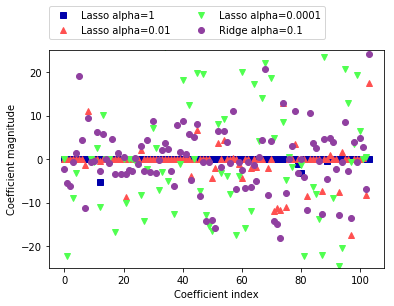

In [38]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

* alpha=1だと、ほとんどの係数が0であり、0でない係数も絶対値が小さい
* alpha=0.0001だと、制約がゆるみ、多くの係数が0でなくなり絶対値も大きい

<br>

### TIPS

実際にこれらの線形回帰モデルを使う場合は、まずはRidge回帰(L2正則化)をトライしてみるといい。  
しかし、特徴量がたくさんあり、かつ、ほとんどの特徴は重要でないと予見できるならLassoの方が向いている。

scikit-learnにはLassoとRidgeを組み合わせた**ElasticNet(L1+L2正則化)**も用意されており、  
実用上はこの正則化が最良の結果となるが処理コストが大きい。

<br>

---

## おわり

誤字脱字、不明点あればご連絡ください。